In [67]:
import cv2
import mediapipe as mp
import tensorflow as tf
import time
import numpy as np
from sklearn.metrics import pairwise_distances
import utils

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

In [79]:
tf.version.VERSION

'2.3.0'

In [65]:
image_path = './videos/tree.gif'

image_path2 = './videos/tree2.gif'
cap1 = cv2.VideoCapture(image_path)
cap2 = cv2.VideoCapture(image_path2)

In [5]:
def get_pose_coord(landmarks1, landmarks2):
    pose1= []
    pose2= []
    for idx, landmark in enumerate(landmarks1):
        x = landmark.x
        y = landmark.y
        z = landmark.z
        pose1.append((x,y,z))

    for idx, landmark in enumerate(landmarks2):
        x = landmark.x
        y = landmark.y
        z = landmark.z
        pose2.append((x,y,z))
    
    return (pose1, pose2)


    

In [6]:
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

In [62]:
def compute_similarity(pose_1, pose_2):
    p1 = []
    p2 = []

    for joint in range(pose_1.shape[0]):
        x1 = pose_1[joint][0]
        y1 = pose_1[joint][1]
        z1 = pose_1[joint][2]
        x2 = pose_2[joint][0]
        y2 = pose_2[joint][1]
        z2 = pose_2[joint][2]

        p1.append(x1)
        p1.append(y1)
        p1.append(z1)
        p2.append(x2)
        p2.append(y2)
        p2.append(z2)

    p1 = np.array(p1,dtype=float)
    p2 = np.array(p2,dtype=float)
    x = [p1,p2]
    euclid = pairwise_distances(x)[0][1]
    cosine = pairwise_distances(x, metric = 'cosine')[0][1]
    
    p1_cos = p1*1000
    p2_cos = p2*1000

    return ("Cosine:",cosine_similarity(p1_cos,p2_cos),"Euclidian:",euclid,"Chebyshev:", pairwise_distances(x, metric='chebyshev')[0][1])
    #return pairwise_distances(x, metric='correlation') 
    


In [66]:
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.6) as Pose_model1:
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.6) as Pose_model2:
        while cap1.isOpened() and cap2.isOpened():
            time.sleep(0.5)
            
            ret1, frame1 = cap1.read()
            ret2, frame2 = cap2.read()
            


            if ret1 and ret2:
                frame_height = max(frame1.shape[0], frame2.shape[0])
                frame_width = max(frame1.shape[1], frame2.shape[1])
                bg_image = np.zeros((frame_height, frame_width,3), dtype=np.uint8)
                frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
                frame1.flags.writeable= False
                frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)
                frame2.flags.writeable= False

                results1 = Pose_model1.process(frame1)
                results2 = Pose_model2.process(frame2)

                frame1 = cv2.cvtColor(frame1, cv2.COLOR_RGB2BGR)
                frame1.flags.writeable= True
                frame2 = cv2.cvtColor(frame2, cv2.COLOR_RGB2BGR)
                frame2.flags.writeable= True

                pose1, pose2 = get_pose_coord(results1.pose_landmarks.landmark, results2.pose_landmarks.landmark)
                pose1 = np.array(pose1)
                pose2 = np.array(pose2)
                score = compute_similarity(pose1, pose2)
                print(score)

                mp_drawing.draw_landmarks(
                frame1,
                results1.pose_landmarks,
                mp_pose.POSE_CONNECTIONS,
                landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())

                mp_drawing.draw_landmarks(
                frame2,
                results2.pose_landmarks,
                mp_pose.POSE_CONNECTIONS,
                landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())

                mp_drawing.draw_landmarks(
                bg_image,
                results1.pose_landmarks,
                mp_pose.POSE_CONNECTIONS)

                mp_drawing.draw_landmarks(
                bg_image,
                results2.pose_landmarks,
                mp_pose.POSE_CONNECTIONS,
                mp_drawing_styles.DrawingSpec(color =(245,117,66),thickness = 2, circle_radius=2 ),
                mp_drawing_styles.DrawingSpec(color =(245,66,230),thickness = 2, circle_radius=2 ))
                cv2.imshow("Vid1", frame1)
                cv2.imshow("vid2", frame2)
                cv2.imshow("Overlapped", bg_image)
            else:
                break


            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

cap1.release()
cap2.release()
cv2.destroyAllWindows()

('Cosine:', 0.9554769567689863, 'Euclidian:', 1.3215897986961906, 'Chebyshev:', 0.3339880704879761)
('Cosine:', 0.949476955087993, 'Euclidian:', 1.4228711940033352, 'Chebyshev:', 0.3947473615407944)
('Cosine:', 0.9469945422190044, 'Euclidian:', 1.4621686076935987, 'Chebyshev:', 0.4138588458299637)
('Cosine:', 0.9491396825452412, 'Euclidian:', 1.4331200454276094, 'Chebyshev:', 0.40659859776496887)
('Cosine:', 0.9546267823807438, 'Euclidian:', 1.3547688696536673, 'Chebyshev:', 0.3873636871576309)
('Cosine:', 0.9589928863885017, 'Euclidian:', 1.2846609583586535, 'Chebyshev:', 0.3663672059774399)
('Cosine:', 0.9606205284220302, 'Euclidian:', 1.2587653581110594, 'Chebyshev:', 0.37285633385181427)
('Cosine:', 0.9590558210229696, 'Euclidian:', 1.28219630060682, 'Chebyshev:', 0.3859880566596985)
('Cosine:', 0.9570737252717895, 'Euclidian:', 1.3098897520202037, 'Chebyshev:', 0.38606518507003784)
('Cosine:', 0.9516201054581923, 'Euclidian:', 1.3995641076136571, 'Chebyshev:', 0.44220562279224396)

In [48]:
q = np.array([[pose1[1][0]],[pose1[1][1]],[pose1[14][0]],[pose1[14][1]]], np.float)

p = np.array([[pose2[1][0], pose2[1][1], 1.0, 0.0, 0.0, 0.0], \
              [0.0, 0.0, 0.0, pose2[1][0], pose2[1][1], 1.0], \
              [pose2[14][0], pose2[14][1], 1.0, 0.0, 0.0, 0.0], \
              [0.0, 0.0, 0.0, pose2[14][0], pose2[14][1], 1.0]], np.float)

A, res, rank, s = np.linalg.lstsq(p, q)

T = np.array([[A[0], A[1], A[2]],[A[3], A[4], A[5]],[0.0, 0.0, 1.0]], np.float)

<ipython-input-48-7a02d6fef2a7>:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  A, res, rank, s = np.linalg.lstsq(p, q)


In [50]:
pose2[1]

array([ 0.4764939 ,  0.25848323, -0.34960312])

In [51]:
pose2_new = []

for elt in pose2:
        
        cur_pt = np.array([elt[0],elt[1],1])
        transformed_pt = T.dot(cur_pt)
        
        transformed_pt = transformed_pt / transformed_pt[2]
        pose2_new.append((int(transformed_pt[0]), int(transformed_pt[1])))

In [53]:
compute_similarity(pose1,pose2_new)

<ipython-input-4-90e4ff436f1a>:2: RuntimeWarning: invalid value encountered in double_scalars
  return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))


(nan, 4.12418172832816, nan)

In [48]:
ar1 = np.random.randn(6,)
ar2 = np.random.randn(6,)
cosine_similarity(ar1, ar2)

0.12946394957809082

In [6]:
max(frame1.shape[0], frame2.shape[0])

338

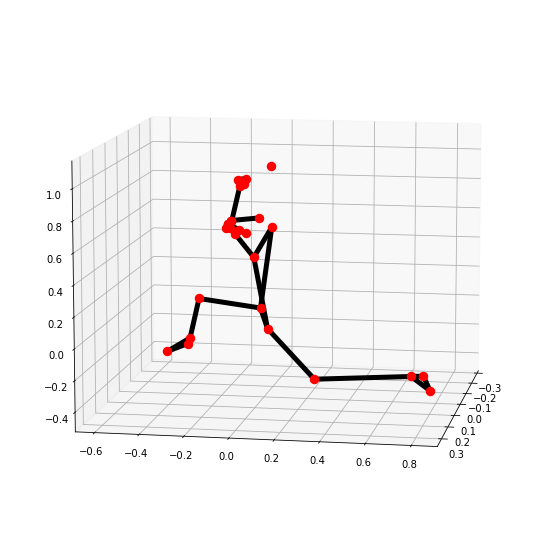

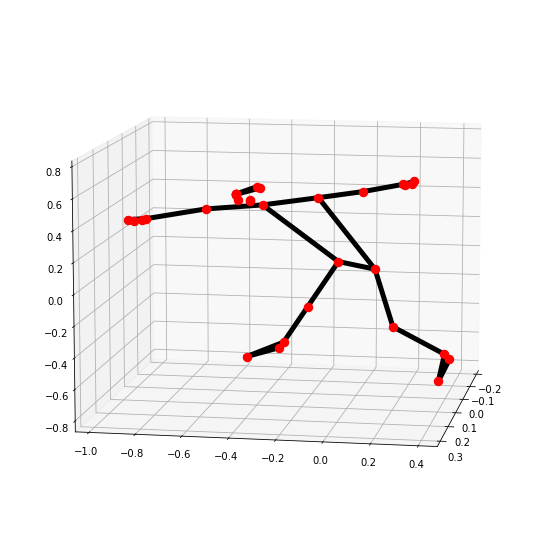

: 

In [8]:
mp_drawing.plot_landmarks(
        results1.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
mp_drawing.plot_landmarks(
        results2.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)